# Rolling and Expanding

A very common process with time series is to create data based off of a rolling mean. Let's show you how to do this easily with pandas!

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Best way to read in data with time series index!
df = pd.read_csv('time_data/walmart_stock.csv',
                 index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

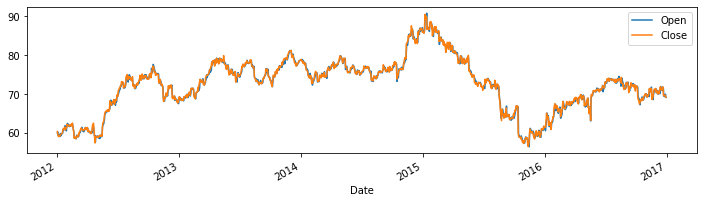

In [4]:
df[['Open','Close']].plot(figsize=(12,3))

## Rolling Mean
> **rolling(window)** specifies the size of moving window.  
> **mean** and other statistics can be applied to these windows.  

In [5]:
# 7 day rolling mean
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

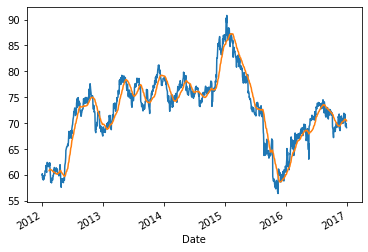

In [6]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

## Create a new column for this rolling value

<AxesSubplot:xlabel='Date'>

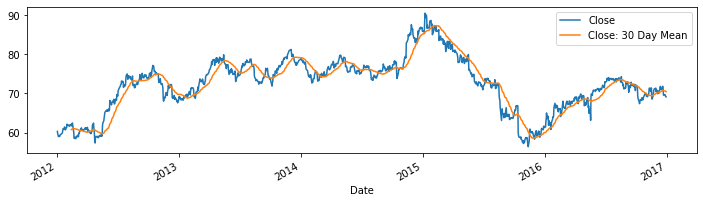

In [7]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,3))

## Expanding
> **expanding(min_periods=1)** starts with window size=1 and continues to expand the window size (step size=1).  
> **mean** and other statistics can be applied to these windows.  

<AxesSubplot:xlabel='Date'>

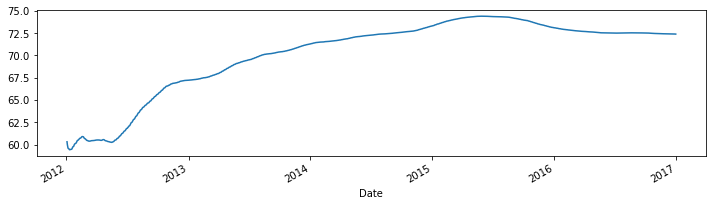

In [8]:
# Optional specify a minimum number of periods
df['Close'].expanding(min_periods=1).mean().plot(figsize=(12,3))

## Bollinger Bands
> 1. Bollinger Bands® shows the **20-period SMA** and the upper/lower bands which are **2 std +/- 20-period SMA**.  
> 2. When actual price is above the upper band, it is regarded as relatively high.  
> 3. Bollinger Bands are for reference only: Not directly imply buying and selling signals.     

> Reference : http://www.investopedia.com/terms/b/bollingerbands.asp

## Activity 1
> 1. Obtain the rolling mean of window size=20.   
> 2. Obtain the rolling standard deviation of these windows.   
> 3. Get a **Upper** band for the moving average as ```mean+2std```.   
> 4. Get a **Lower** band for the moving average as ```mean-2std```.   
> 5. Plot the 4 lines in the same figure. 

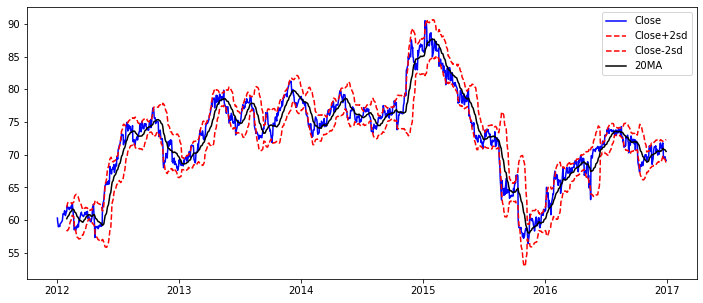

In [9]:
df = pd.read_csv('time_data/walmart_stock.csv',
                 index_col='Date',parse_dates=True)

df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()

data = df[['Close','Close: 30 Day Mean','Upper','Lower']]

fig,ax = plt.subplots(figsize=(12,5))
ax.plot(df['Close'],color="blue", linestyle='-', label='Close')
ax.plot(df['Upper'],color="red", linestyle='--', label='Close+2sd')
ax.plot(df['Lower'],color="red", linestyle='--', label='Close-2sd')
ax.plot(df['Close: 30 Day Mean'],color="black", linestyle='-', label='20MA')

ax.legend(loc=0)